In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas.api.types as ptypes
#import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import t as t_dist
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from scipy.stats import f as f_dist
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
df = pd.read_csv('data_final.csv')

In [3]:
import pandas as pd
df = df.dropna(subset=['bpm', 'energy', 'danceability', 'loudness',
                        'valence', 'length', 'acousticness', 'artist_seperation'])

In [4]:
def mode_language(series):
    non_null = series.dropna()
    if non_null.empty:
        return None
    else:
        return non_null.mode().iloc[0]

artist_mode = df.groupby('artist')['language'].apply(mode_language)

def impute_language(row):
    if pd.isnull(row['language']):
        return artist_mode.get(row['artist'], None)
    else:
        return row['language']

df['language'] = df.apply(impute_language, axis=1)

In [5]:
missing_rows = df[df.isnull().any(axis=1)]
print(f'The percentage of entries with missing data: {len(missing_rows)/len(df) * 100:.2f}%')
print("- " * 30)
for column in df.columns:
    missing_count = df[column].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"  Column '{column}': \n       Missing values count: {missing_count}, {missing_percentage:.2f}% missing\n")

The percentage of entries with missing data: 39.23%
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  Column 'Unnamed: 0': 
       Missing values count: 0, 0.00% missing

  Column 'track_id': 
       Missing values count: 0, 0.00% missing

  Column 'artist': 
       Missing values count: 0, 0.00% missing

  Column 'song': 
       Missing values count: 0, 0.00% missing

  Column 'release_date': 
       Missing values count: 20, 0.59% missing

  Column 'total_weeks': 
       Missing values count: 0, 0.00% missing

  Column 'peak_position': 
       Missing values count: 0, 0.00% missing

  Column 'peak_streams': 
       Missing values count: 0, 0.00% missing

  Column 'total_streams': 
       Missing values count: 0, 0.00% missing

  Column 'release_month': 
       Missing values count: 20, 0.59% missing

  Column 'release_season': 
       Missing values count: 20, 0.59% missing

  Column 'first_peak_date': 
       Missing values count: 0, 0.00% missing

  Column 'peak_season

In [6]:
import pandas as pd
df = df.dropna(subset=['language'])

In [7]:
df['language'].unique()

array(['Ukrainian', 'English', 'Russian', 'German', 'Esperanto',
       'Portuguese', 'Italian', 'Bulgarian', 'Swahili', 'Spanish',
       'French', 'Polish', 'Korean', 'Indonesian', 'Japanese', 'Dutch',
       'Finnish', 'Albanian', 'Tagalog', 'Latin', 'Slovenian', 'Bosnian',
       'Romanian', 'Lithuanian', 'Catalan', 'Swedish', 'Turkish',
       'Chinese', 'Croatian'], dtype=object)

In [8]:
df['english_lang'] = (df['language'] == 'English').astype(int)
df['ukrainian_lang'] = (df['language'] == 'Ukrainian').astype(int)
df['russian_lang'] = (df['language'] == 'Russian').astype(int)
df['other_lang'] = (
    (df['language'] != 'Russian') &
    (df['language'] != 'Ukrainian') &
    (df['language'] != 'English')
).astype(int)

In [9]:
df['fall_release'] = (df['release_season'] == 'Fall').astype(int)
df['spring_release'] = (df['release_season'] == 'Spring').astype(int)
df['summer_release'] = (df['release_season'] == 'Summer').astype(int)
df['winter_release'] = (df['release_season'] == 'Winter').astype(int)
df.head(10)

,Unnamed: 0,track_id,artist,song,release_date,total_weeks,peak_position,peak_streams,total_streams,release_month,...,artist_seperation,debut_position,english_lang,ukrainian_lang,russian_lang,other_lang,fall_release,spring_release,summer_release,winter_release
0,0,61BaxM1NIcadLu3gtWm2uT,sadsvit,силуети,2022-10-28,126,1,263673,17102909,10.0,...,61.0,1,0,1,0,0,1,0,0,0
1,1,2QjOHCTQ1Jl3zawyYOpxh6,the neighbourhood,sweater weather,2013-04-22,234,16,75675,12393368,4.0,...,91.0,171,1,0,0,0,0,1,0,0
2,2,4MQmxIxM5CXKjdq4IrCWhd,sadsvit,касета,2021-12-13,154,1,296336,11790369,12.0,...,61.0,53,0,1,0,0,0,0,0,1
3,3,6gtK39SLszESqJFu2SkId3,wellboy,додому,2022-12-16,117,5,115203,10613534,12.0,...,54.0,79,0,1,0,0,0,0,0,1
4,4,66Xj2OpnDALdW0G509b9yY,yaktak,погляд,2022-10-13,108,1,171097,9534146,10.0,...,54.0,57,0,1,0,0,1,0,0,0
5,5,21LIoC4ZxT3F8xq9gidNbX,xxxmanera,never broke again,2022-04-08,145,1,129007,9524035,4.0,...,60.0,96,1,0,0,0,0,1,0,0
6,6,6bCLkzoE3agC7Ws9NxVxIn,krbk,крепче,2016-01-05,118,8,129377,9492031,1.0,...,63.0,184,0,0,1,0,0,0,0,1
7,7,1N8TTK1Uoy7UvQNUazfUt5,thxsomch,spit in my face!,2022-12-20,113,1,241572,9187236,12.0,...,80.0,100,1,0,0,0,0,0,0,1
8,8,2GxrNKugF82CnoRFbQfzPf,artemas,i like the way you kiss me,2024-03-19,54,1,509776,9051129,3.0,...,84.0,107,1,0,0,0,0,1,0,0
9,9,0vByMmR3Y8MBorEEE5Pmie,parfeniuk,відриваючись,2023-05-03,100,5,165999,9034842,5.0,...,56.0,77,0,1,0,0,0,1,0,0


In [10]:
df['top50'] = (df['peak_position'] < 51).astype(int)
df.head(10)

,Unnamed: 0,track_id,artist,song,release_date,total_weeks,peak_position,peak_streams,total_streams,release_month,...,debut_position,english_lang,ukrainian_lang,russian_lang,other_lang,fall_release,spring_release,summer_release,winter_release,top50
0,0,61BaxM1NIcadLu3gtWm2uT,sadsvit,силуети,2022-10-28,126,1,263673,17102909,10.0,...,1,0,1,0,0,1,0,0,0,1
1,1,2QjOHCTQ1Jl3zawyYOpxh6,the neighbourhood,sweater weather,2013-04-22,234,16,75675,12393368,4.0,...,171,1,0,0,0,0,1,0,0,1
2,2,4MQmxIxM5CXKjdq4IrCWhd,sadsvit,касета,2021-12-13,154,1,296336,11790369,12.0,...,53,0,1,0,0,0,0,0,1,1
3,3,6gtK39SLszESqJFu2SkId3,wellboy,додому,2022-12-16,117,5,115203,10613534,12.0,...,79,0,1,0,0,0,0,0,1,1
4,4,66Xj2OpnDALdW0G509b9yY,yaktak,погляд,2022-10-13,108,1,171097,9534146,10.0,...,57,0,1,0,0,1,0,0,0,1
5,5,21LIoC4ZxT3F8xq9gidNbX,xxxmanera,never broke again,2022-04-08,145,1,129007,9524035,4.0,...,96,1,0,0,0,0,1,0,0,1
6,6,6bCLkzoE3agC7Ws9NxVxIn,krbk,крепче,2016-01-05,118,8,129377,9492031,1.0,...,184,0,0,1,0,0,0,0,1,1
7,7,1N8TTK1Uoy7UvQNUazfUt5,thxsomch,spit in my face!,2022-12-20,113,1,241572,9187236,12.0,...,100,1,0,0,0,0,0,0,1,1
8,8,2GxrNKugF82CnoRFbQfzPf,artemas,i like the way you kiss me,2024-03-19,54,1,509776,9051129,3.0,...,107,1,0,0,0,0,1,0,0,1
9,9,0vByMmR3Y8MBorEEE5Pmie,parfeniuk,відриваючись,2023-05-03,100,5,165999,9034842,5.0,...,77,0,1,0,0,0,1,0,0,1


In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['after2022'] = (df['release_date'] > pd.to_datetime('2022-02-24')).astype(int)

In [12]:
language_dummy_columns = ['english_lang', 'ukrainian_lang', 'other_lang']

time_indicator_column = 'after2022'

for lang_col in language_dummy_columns:
    interaction_col_name = f"{lang_col}_x_{time_indicator_column}" # e.g., 'english_lang_x_after2022'

    if lang_col in df.columns and time_indicator_column in df.columns:
        df[interaction_col_name] = df[lang_col] * df[time_indicator_column]
        print(f" -> Created column: '{interaction_col_name}'")
    else:
        print(f" -> Could not create interaction for '{lang_col}'. Check source column names.")

new_interaction_cols = [f"{lang_col}_x_{time_indicator_column}" for lang_col in language_dummy_columns if f"{lang_col}_x_{time_indicator_column}" in df.columns]

 -> Created column: 'english_lang_x_after2022'
 -> Created column: 'ukrainian_lang_x_after2022'
 -> Created column: 'other_lang_x_after2022'


In [13]:
df['artist_seperation_x_english_lang'] = df['artist_seperation']*df['english_lang']

In [15]:
def select_model(data, columns, dependant_var_name, intercept=True):
    y = data[dependant_var_name]
    X = data[columns]
    if intercept:
        X = sm.add_constant(X)
    best_model = sm.Logit(endog=y, exog=X).fit()
    aic_lst = []
    for col in columns:
        temp_x = X.drop(col, axis=1)
        temp_model = sm.Logit(endog=y, exog=temp_x).fit()
        curr_aic = temp_model.aic
        aic_lst.append({"dropped": col, "model_AIC": curr_aic})
        if curr_aic <= best_model.aic:
            best_model = temp_model
    return pd.DataFrame(aic_lst).style.background_gradient(cmap='viridis').highlight_min(color="red", subset=["model_AIC"]), best_model

x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top50", intercept=True)

display(aic_df)
print(best_model.summary())


Optimization terminated successfully.
         Current function value: 0.624671
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624883
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625962
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627798
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624728
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624692
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624923
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625830
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648626
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624944
  

,dropped,model_AIC
0,bpm,4139.733156
1,energy,4146.814714
2,danceability,4158.865618
3,loudness,4138.714452
4,valence,4138.475022
5,length,4139.996837
6,acousticness,4145.948947
7,artist_seperation,4295.581426
8,ukrainian_lang,4140.129167
9,english_lang,4138.824811


                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3263
Method:                           MLE   Df Model:                           18
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05754
Time:                        13:35:24   Log-Likelihood:                -2050.2
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 6.870e-43
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.7736      0.570     -4.869      0.000      -3.890      -1.657
bpm                                  0.0016      0.001      1.158

In [16]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top50", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.624692
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624896
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626161
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628072
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624749
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625903
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648627
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624974
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624765
  

,dropped,model_AIC
0,bpm,4137.817384
1,energy,4146.121183
2,danceability,4158.666145
3,loudness,4136.851106
4,length,4138.082920
5,acousticness,4144.426159
6,artist_seperation,4293.589208
7,ukrainian_lang,4138.332316
8,english_lang,4136.955045
9,other_lang,4156.040829


                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3264
Method:                           MLE   Df Model:                           17
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05746
Time:                        13:35:35   Log-Likelihood:                -2050.4
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 2.096e-43
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.9677      0.474     -6.263      0.000      -3.896      -2.039
bpm                                  0.0016      0.001      1.151

In [17]:
x_cols = ['bpm', 'energy','danceability', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top50", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.624749
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626604
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624993
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626036
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648864
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625027
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.624820
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627699
  

,dropped,model_AIC
0,bpm,4136.176321
1,energy,4147.031361
2,danceability,4158.115500
3,length,4136.452149
4,acousticness,4143.300530
5,artist_seperation,4293.140551
6,ukrainian_lang,4136.679492
7,english_lang,4135.318965
8,other_lang,4154.218444
9,spring_release,4137.594389


                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3265
Method:                           MLE   Df Model:                           16
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05735
Time:                        13:35:42   Log-Likelihood:                -2050.7
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 6.485e-44
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.8777      0.455     -6.326      0.000      -3.769      -1.986
bpm                                  0.0016      0.001      1.133

In [18]:
x_cols = ['bpm', 'energy','danceability', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top50", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.624820
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625016
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626658
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628306
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653297
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625110
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627703
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625250
  

,dropped,model_AIC
0,bpm,4134.603767
1,energy,4145.380987
2,danceability,4156.197595
3,length,4135.105353
4,acousticness,4141.760830
5,artist_seperation,4320.238261
6,ukrainian_lang,4135.222297
7,other_lang,4152.239417
8,spring_release,4136.137921
9,summer_release,4137.911448


                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3266
Method:                           MLE   Df Model:                           15
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05722
Time:                        13:35:53   Log-Likelihood:                -2050.9
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 2.029e-44
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.9166      0.452     -6.452      0.000      -3.803      -2.031
bpm                                  0.0016      0.001      1.142

In [19]:
x_cols = ['bpm', 'energy','danceability', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top50", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.624905
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626745
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628440
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625125
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626147
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653934
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625157
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627703
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625330
  

,dropped,model_AIC
0,bpm,4133.182443
1,energy,4143.955542
2,danceability,4155.081061
3,length,4133.318620
4,acousticness,4140.028318
5,artist_seperation,4322.419972
6,ukrainian_lang,4133.528927
7,other_lang,4150.243696
8,spring_release,4134.663429
9,summer_release,4136.506095


                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3267
Method:                           MLE   Df Model:                           14
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05692
Time:                        13:36:03   Log-Likelihood:                -2051.6
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 8.761e-45
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.6761      0.399     -6.707      0.000      -3.458      -1.894
energy                              -0.0092      0.003     -3.402

In [20]:
x_cols = ['energy','danceability', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top50", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.625104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626873
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628485
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625359
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626400
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625378
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627884
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625536
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625816
  

,dropped,model_AIC
0,energy,4142.795049
1,danceability,4153.374667
2,length,4132.855935
3,acousticness,4139.690093
4,artist_seperation,4320.999697
5,ukrainian_lang,4132.983381
6,other_lang,4149.430521
7,spring_release,4134.016841
8,summer_release,4135.858198
9,winter_release,4135.052461


                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3268
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05654
Time:                        13:36:10   Log-Likelihood:                -2052.4
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 4.363e-45
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.8905      0.363     -7.953      0.000      -3.603      -2.178
energy                              -0.0090      0.003     -3.359

In [21]:
x_cols = ['energy','danceability', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df, x_cols, "top50", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.625359
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627084
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629246
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626628
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654039
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625744
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628316
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626045
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625936
  

,dropped,model_AIC
0,energy,4142.176794
1,danceability,4156.371742
2,acousticness,4139.184821
3,artist_seperation,4319.115106
4,ukrainian_lang,4133.385297
5,other_lang,4150.267202
6,spring_release,4133.563178
7,summer_release,4135.360549
8,winter_release,4134.642839
9,english_lang_x_after2022,4143.570866


                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3268
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05654
Time:                        13:36:15   Log-Likelihood:                -2052.4
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 4.363e-45
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.8905      0.363     -7.953      0.000      -3.603      -2.178
energy                              -0.0090      0.003     -3.359

In [22]:
def plot_roc_curve(y_true, y_pred_prob):

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = round(roc_auc_score(y_true=y_true, y_score=y_pred_prob),2)

    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label=f'model (area = {auc})')
    plt.plot([0, 1], [0, 1],'r--', label='random baseline (area = 0.5)')

    id_x = pd.Series(abs(tpr - fpr), index=fpr).idxmax()
    plt.axvline(x=id_x, linestyle='dashed', color='black', label='maximizes classifiers performance')
    id_y = pd.Series(abs(tpr - fpr), index=tpr).idxmax()
    plt.axhline(y=id_y, linestyle='dashed', color='black', label='maximizes classifiers performance')

    optimal_threshold_index = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_threshold_index]
    print('Optimal Threshold :', optimal_threshold)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for y_top50')
    plt.legend(loc=(1.05,0.6))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.show()

In [23]:
import statsmodels.formula.api as smf

logistic_model = smf.logit(
    'top50 ~ energy + danceability + acousticness + artist_seperation + ukrainian_lang +'
    'other_lang + spring_release + summer_release + winter_release +'
    'english_lang_x_after2022 + ukrainian_lang_x_after2022 + other_lang_x_after2022 + artist_seperation_x_english_lang',
    data=df
)
logistic_results = logistic_model.fit()
print(logistic_results.summary())

aic_value = logistic_results.aic
bic_value = logistic_results.bic

print(f"\nAIC: {aic_value}")
print(f"BIC: {bic_value}")

Optimization terminated successfully.
         Current function value: 0.625359
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3268
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05654
Time:                        13:37:02   Log-Likelihood:                -2052.4
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 4.363e-45
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.8905      0.363     -7.95

In [26]:
import random
random_indices = random.sample(range(len(df)), 5)
indices_to_calculate = set(random_indices)

independent_vars = ['energy','danceability', 'artist_seperation', 'acousticness', 'ukrainian_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
coefficients = logistic_results.params

def logit(z):
    return np.exp(z) / (1+np.exp(z))

for index, row in df.iterrows():
    if index in indices_to_calculate:
        linear_predictor = coefficients['Intercept']
        for var in independent_vars:
            linear_predictor += coefficients[var] * row[var]

        probability = logit(linear_predictor)
        print(f"Observation {index}: Predicted Probability = {probability:.4f}")

Observation 45: Predicted Probability = 0.5557
Observation 1099: Predicted Probability = 0.2862
Observation 1232: Predicted Probability = 0.6182
Observation 1290: Predicted Probability = 0.6891
Observation 3275: Predicted Probability = 0.5227


In [28]:
from sklearn.metrics import confusion_matrix

df['top50_pred'] = logistic_results.predict(df[independent_vars])
cm = confusion_matrix(df['top50'], (df['top50_pred'] >= 0.3452107257942383).astype(int))

confusion_matrix_df = pd.DataFrame(cm, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
confusion_matrix_df.T

,actual_0,actual_1
predicted_0,1048,353
predicted_1,995,886


Optimal Threshold : 0.3452107257942383


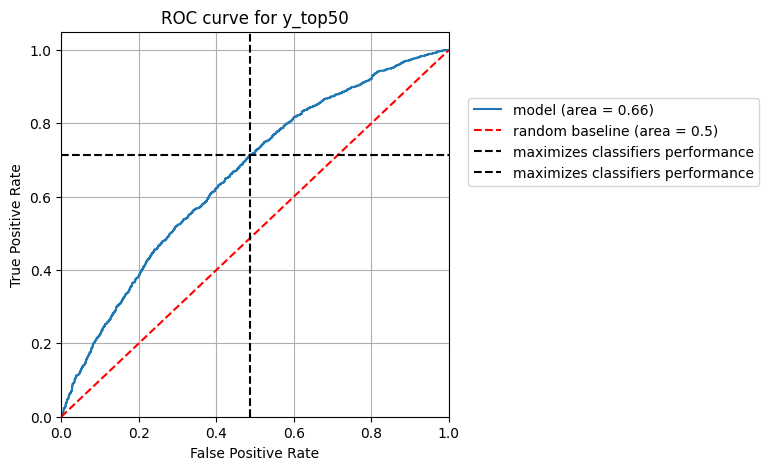

In [29]:
plot_roc_curve(y_true=df['top50'], y_pred_prob=df['top50_pred'])

In [30]:
fpr, tpr, thresholds = roc_curve(df['top50'], df['top50_pred'])
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

In [31]:
tn, fp, fn, tp = confusion_matrix(df['top50'], (df['top50_pred'] >= optimal_threshold).astype(int)).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(accuracy)

0.5892748324192566


In [32]:
recall = tp / (tp+fn)
print(recall)

0.7150928167877321


In [33]:
specificity = tn / (tn+fp)
print(specificity)

0.5129711209006363


In [35]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness',
          'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang',
          'spring_release', 'summer_release', 'winter_release', 'after2022',
          'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']

audio_features_to_test = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness']

full_formula = 'top50 ~ ' + ' + '.join(x_cols)

reduced_x_cols = [col for col in x_cols if col not in audio_features_to_test]
reduced_formula = 'top50 ~ ' + ' + '.join(reduced_x_cols)

full_model_fit = smf.logit(full_formula, data=df).fit(maxiter=1000, disp=False)
print(full_model_fit.summary())

reduced_model_fit = smf.logit(reduced_formula, data=df).fit(maxiter=1000, disp=False)
print(reduced_model_fit.summary())

llf_full = full_model_fit.llf
llf_reduced = reduced_model_fit.llf

print(f"\nLog-likelihood Full Model: {llf_full:.4f}")
print(f"Log-likelihood Reduced Model: {llf_reduced:.4f}")

lrt_statistic = -2 * (llf_reduced - llf_full)
print(f"\nCalculated LRT Statistic: {lrt_statistic:.4f}")

df_lrt = len(audio_features_to_test)
print(f"Degrees of Freedom for LRT: {df_lrt}")

p_value = chi2.sf(lrt_statistic, df_lrt)

print(f"Calculated P-value: {p_value:.15f}")

alpha = 0.05

if p_value < alpha:
    print(f"\nThe calculated p-value ({p_value:.4f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis. This indicates that the audio features (as a group) significantly improve the model's fit.")
else:
    print(f"The calculated p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis. There is not enough evidence from this test to conclude that the audio features (as a group) significantly improve the model's fit.")

                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3262
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05758
Time:                        13:40:19   Log-Likelihood:                -2050.2
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 2.450e-42
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.7989      0.574     -4.877      0.000      -3.924      -1.674
bpm                                  0.0017      0.001      1.180

In [36]:
interaction_vars_to_test = ['english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022']

reduced_x_cols_for_interaction_test = [col for col in x_cols if col not in interaction_vars_to_test]

reduced_formula_interaction_test = 'top50 ~ ' + ' + '.join(reduced_x_cols_for_interaction_test)


full_model_fit = smf.logit(full_formula, data=df).fit(disp=False)
print(full_model_fit.summary())

reduced_model_fit_interaction_test = smf.logit(reduced_formula_interaction_test, data=df).fit(disp=False)
print(reduced_model_fit_interaction_test.summary())

llf_full = full_model_fit.llf
llf_reduced_interaction_test = reduced_model_fit_interaction_test.llf

print(f"\nLog-likelihood Full Model: {llf_full:.4f}")
print(f"Log-likelihood Reduced Model (testing interactions): {llf_reduced_interaction_test:.4f}")

lrt_statistic_interaction_test = -2 * (llf_reduced_interaction_test - llf_full)
print(f"\nCalculated LRT Statistic (testing interactions): {lrt_statistic_interaction_test:.4f}")

df_lrt_interaction_test = len(interaction_vars_to_test)
p_value_interaction_test = chi2.sf(lrt_statistic_interaction_test, df_lrt_interaction_test)

print(f"Calculated P-value (testing interactions): {p_value_interaction_test:.10f}")

alpha = 0.05

if p_value_interaction_test < alpha:
    print(f"\nInterpretation (Testing Interactions): The calculated p-value ({p_value_interaction_test:.10f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis for this test. This provides statistical evidence that the interaction terms ('english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022') are jointly significant.")
else:
    print(f"\nInterpretation (Testing Interactions): The calculated p-value ({p_value_interaction_test:.10f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis for this test. There is not enough statistical evidence to conclude that the interaction terms are jointly significant, given the main effects are in the model.")

                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3262
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05758
Time:                        13:40:47   Log-Likelihood:                -2050.2
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 2.450e-42
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.7989      0.574     -4.877      0.000      -3.924      -1.674
bpm                                  0.0017      0.001      1.180

In [37]:
variables_to_test = ['spring_release', 'summer_release', 'winter_release']

reduced_x_cols = [col for col in x_cols if col not in variables_to_test]
reduced_formula = 'top50 ~ ' + ' + '.join(reduced_x_cols)


full_model_fit = smf.logit(full_formula, data=df).fit(disp=False)
print(full_model_fit.summary())

reduced_model_fit = smf.logit(reduced_formula, data=df).fit(disp=False)
print(reduced_model_fit.summary())

llf_full = full_model_fit.llf
llf_reduced = reduced_model_fit.llf

print(f"\nLog-likelihood Full Model: {llf_full:.4f}")
print(f"Log-likelihood Reduced Model: {llf_reduced:.4f}")

lrt_statistic = -2 * (llf_reduced - llf_full)
print(f"\nCalculated LRT Statistic: {lrt_statistic:.4f}")

df_lrt = len(variables_to_test)
p_value = chi2.sf(lrt_statistic, df_lrt)

print(f"Calculated P-value: {p_value:.10f}")

alpha = 0.05

if p_value < alpha:
    print(f"\nInterpretation: The calculated p-value ({p_value:.10f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis.")
else:
    print(f"\nInterpretation: The calculated p-value ({p_value:.10f}) is greater than or equal to the significance level ({alpha}).")
    print("We fail to reject the null hypothesis.")

                           Logit Regression Results                           
Dep. Variable:                  top50   No. Observations:                 3282
Model:                          Logit   Df Residuals:                     3262
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.05758
Time:                        13:41:05   Log-Likelihood:                -2050.2
converged:                       True   LL-Null:                       -2175.4
Covariance Type:            nonrobust   LLR p-value:                 2.450e-42
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.7989      0.574     -4.877      0.000      -3.924      -1.674
bpm                                  0.0017      0.001      1.180

In [38]:
df_copy = df[df['peak_position'] < 51].copy()

In [39]:
df_copy.tail(5)

,Unnamed: 0,track_id,artist,song,release_date,total_weeks,peak_position,peak_streams,total_streams,release_month,...,spring_release,summer_release,winter_release,top50,after2022,english_lang_x_after2022,ukrainian_lang_x_after2022,other_lang_x_after2022,artist_seperation_x_english_lang,top50_pred
3175,3175,3Ys2PYl1wyPKQIwyqhP9cQ,bts,stay gold,2020-07-14,2,10,9624,24912,7.0,...,0,1,0,1,0,0,0,0,0.0,0.341381
3200,3200,5dOxHHMOFAbG3VH23t0xNm,juice wrld,righteous,2020-07-10,2,31,5717,23640,7.0,...,0,1,0,1,0,0,0,0,73.0,0.319065
3232,3232,5wWAwzGp2OaaoIkwcz6wZs,juice wrld,life's a mess,2020-07-10,2,23,6890,22856,7.0,...,0,1,0,1,0,0,0,0,76.0,0.280331
3315,3315,4K06PO78fW4mnBVenxGNob,juice wrld,conversations,2020-07-10,2,42,4979,19425,7.0,...,0,1,0,1,0,0,0,0,75.0,0.328043
3534,3534,3DXdjHnePKnh6oXw2ZgGSl,katy perry,smile,2020-07-10,1,33,5656,5656,7.0,...,0,1,0,1,0,0,0,0,55.0,0.201112


In [40]:
df_copy['top10'] = (df_copy['peak_position'] < 11).astype(int)

In [41]:
full_formula = 'top10 ~ ' + ' + '.join(x_cols)
reduced_formula = 'top10 ~ ' + ' + '.join(full_formula)

full_model_fit = smf.logit(full_formula, data=df_copy).fit(maxiter=1000, disp=False)
print(full_model_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1219
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.08258
Time:                        13:43:02   Log-Likelihood:                -702.92
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 6.543e-18
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -3.6221      1.065     -3.400      0.001      -5.710      -1.534
bpm                                  0.0025      0.003      0.983

In [42]:
x_cols = ['bpm', 'energy','danceability', 'loudness', 'valence', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.567326
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567717
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570818
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570039
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567331
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569840
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573381
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599952
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567337
  

,dropped,model_AIC
0,bpm,1444.803670
1,energy,1452.487155
2,danceability,1450.557566
3,loudness,1443.847450
4,valence,1444.680766
5,length,1450.062807
6,acousticness,1458.838566
7,artist_seperation,1524.681641
8,ukrainian_lang,1443.861541
9,english_lang,1451.562929


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                           18
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.08257
Time:                        13:43:40   Log-Likelihood:                -702.92
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 2.425e-18
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6855      0.904     -4.079      0.000      -5.456      -1.915
bpm                                  0.0025      0.003      0.983

In [43]:
x_cols = ['bpm', 'energy','danceability', 'valence', 'length', 'acousticness', 'artist_seperation', 'ukrainian_lang', 'english_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.567331
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567722
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572273
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570094
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567678
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569846
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573645
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600351
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567342
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570453
  

,dropped,model_AIC
0,bpm,1442.815712
1,energy,1454.091386
2,danceability,1448.693141
3,valence,1442.706032
4,length,1448.079180
5,acousticness,1457.491406
6,artist_seperation,1523.669875
7,ukrainian_lang,1441.872337
8,english_lang,1449.583104
9,other_lang,1456.767722


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1221
Method:                           MLE   Df Model:                           17
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.08256
Time:                        13:43:50   Log-Likelihood:                -702.94
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 8.779e-19
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6904      0.903     -4.087      0.000      -5.460      -1.920
bpm                                  0.0025      0.003      0.994

In [44]:
x_cols = ['bpm', 'energy','danceability', 'valence', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'summer_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.567342
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567742
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572286
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570145
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569922
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573727
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570469
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573371
  

,dropped,model_AIC
0,bpm,1440.863668
1,energy,1452.124714
2,danceability,1446.819616
3,valence,1440.715669
4,length,1446.267512
5,acousticness,1455.696670
6,artist_seperation,1521.679463
7,english_lang,1447.622510
8,other_lang,1454.813884
9,spring_release,1446.606601


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           16
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.08246
Time:                        13:44:41   Log-Likelihood:                -703.01
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 3.257e-19
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6698      0.901     -4.072      0.000      -5.436      -1.903
bpm                                  0.0025      0.003      0.980

In [45]:
x_cols = ['bpm', 'energy','danceability', 'valence', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.567402
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567791
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572303
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570195
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567747
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569972
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573754
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.600476
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570513
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573470
  

,dropped,model_AIC
0,bpm,1438.985175
1,energy,1450.167322
2,danceability,1444.941988
3,valence,1438.875940
4,length,1444.390364
5,acousticness,1453.763410
6,artist_seperation,1519.979027
7,english_lang,1445.731131
8,other_lang,1453.058325
9,spring_release,1447.343562


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1223
Method:                           MLE   Df Model:                           15
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.08190
Time:                        13:44:54   Log-Likelihood:                -703.44
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 1.606e-19
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.8280      0.888     -4.313      0.000      -5.568      -2.088
bpm                                  0.0028      0.003      1.097

In [46]:
x_cols = ['bpm', 'energy','danceability', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.567747
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568233
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572324
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571901
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570412
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573885
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601387
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.570793
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573708
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571428
  

,dropped,model_AIC
0,bpm,1438.082302
1,energy,1448.218978
2,danceability,1447.171007
3,length,1443.482155
4,acousticness,1452.086862
5,artist_seperation,1520.237328
6,english_lang,1444.424817
7,other_lang,1451.647280
8,spring_release,1445.997871
9,winter_release,1438.309770


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1224
Method:                           MLE   Df Model:                           14
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.08112
Time:                        13:45:03   Log-Likelihood:                -704.04
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 9.018e-20
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.3684      0.780     -4.319      0.000      -4.897      -1.840
energy                              -0.0162      0.005     -3.289

In [47]:
x_cols = ['energy','danceability', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'other_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.568233
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572653
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572045
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571329
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574419
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601550
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571180
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574216
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571905
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568766
  

,dropped,model_AIC
0,energy,1447.034463
1,danceability,1445.527777
2,length,1443.754468
3,acousticness,1451.409438
4,artist_seperation,1518.641464
5,english_lang,1443.385143
6,other_lang,1450.906333
7,spring_release,1445.180791
8,winter_release,1437.401942
9,after2022,1446.320804


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1225
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.08028
Time:                        13:45:15   Log-Likelihood:                -704.68
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 5.093e-20
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.4374      0.778     -4.418      0.000      -4.962      -1.913
energy                              -0.0158      0.005     -3.225

In [48]:
x_cols = ['energy','danceability', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'winter_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.568751
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573001
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572827
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572014
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574831
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602261
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571751
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575606
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572316
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569246
  

,dropped,model_AIC
0,energy,1445.897162
1,danceability,1445.465295
2,length,1443.451417
3,acousticness,1450.431232
4,artist_seperation,1518.402019
5,english_lang,1442.800118
6,other_lang,1452.352014
7,spring_release,1444.199876
8,winter_release,1436.591114
9,after2022,1444.558135


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1226
Method:                           MLE   Df Model:                           12
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.07948
Time:                        13:45:36   Log-Likelihood:                -705.30
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 2.714e-20
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.4989      0.776     -4.508      0.000      -5.020      -1.978
energy                              -0.0157      0.005     -3.210

In [49]:
x_cols = ['energy','danceability', 'length', 'acousticness', 'artist_seperation', 'english_lang', 'other_lang', 'spring_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
aic_df, best_model = select_model(df_copy, x_cols, "top10", intercept=True)

display(aic_df)
print(best_model.summary())

Optimization terminated successfully.
         Current function value: 0.569246
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573455
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572458
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575224
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602327
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572169
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576065
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572338
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572761
  

,dropped,model_AIC
0,energy,1445.020333
1,danceability,1445.250086
2,length,1442.551628
3,acousticness,1449.406046
4,artist_seperation,1516.566859
5,english_lang,1441.833880
6,other_lang,1451.487957
7,spring_release,1442.252811
8,after2022,1443.300930
9,english_lang_x_after2022,1450.865516


                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1226
Method:                           MLE   Df Model:                           12
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.07948
Time:                        13:45:52   Log-Likelihood:                -705.30
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 2.714e-20
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.4989      0.776     -4.508      0.000      -5.020      -1.978
energy                              -0.0157      0.005     -3.210

In [50]:
logistic_model = smf.logit(
    'top10 ~ energy + danceability + length + acousticness + artist_seperation +'
    'english_lang + other_lang + spring_release + after2022 + '
    'english_lang_x_after2022 + ukrainian_lang_x_after2022 + artist_seperation_x_english_lang',
    data=df_copy
)
logistic_results_1 = logistic_model.fit()
print(logistic_results_1.summary())

aic_value = logistic_results_1.aic
bic_value = logistic_results_1.bic

print(f"\nAIC: {aic_value}")
print(f"BIC: {bic_value}")

Optimization terminated successfully.
         Current function value: 0.569246
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  top10   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1226
Method:                           MLE   Df Model:                           12
Date:                Fri, 09 May 2025   Pseudo R-squ.:                 0.07948
Time:                        13:46:49   Log-Likelihood:                -705.30
converged:                       True   LL-Null:                       -766.19
Covariance Type:            nonrobust   LLR p-value:                 2.714e-20
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -3.4989      0.776     -4.50

In [52]:
random_indices = random.sample(range(len(df)), 5)
indices_to_calculate = set(random_indices)

independent_vars = ['energy','danceability', 'length', 'artist_seperation', 'acousticness', 'english_lang', 'other_lang', 'spring_release', 'after2022', 'english_lang_x_after2022', 'ukrainian_lang_x_after2022', 'artist_seperation_x_english_lang']
coefficients = logistic_results_1.params

for index, row in df_copy.iterrows():
    if index in indices_to_calculate:
        linear_predictor = coefficients['Intercept']
        for var in independent_vars:
            linear_predictor += coefficients[var] * row[var]

        probability = logit(linear_predictor)
        print(f"Observation {index}: Predicted Probability = {probability:.4f}")

Observation 1041: Predicted Probability = 0.3945


In [54]:
from sklearn.metrics import confusion_matrix

df_copy['top10_pred'] = logistic_results_1.predict(df_copy[independent_vars])
cm = confusion_matrix(df_copy['top10'], (df_copy['top10_pred'] >= 0.3130840276343892).astype(int))

confusion_matrix_df = pd.DataFrame(cm, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
confusion_matrix_df.T

,actual_0,actual_1
predicted_0,542,138
predicted_1,314,245


Optimal Threshold : 0.3042485380804295


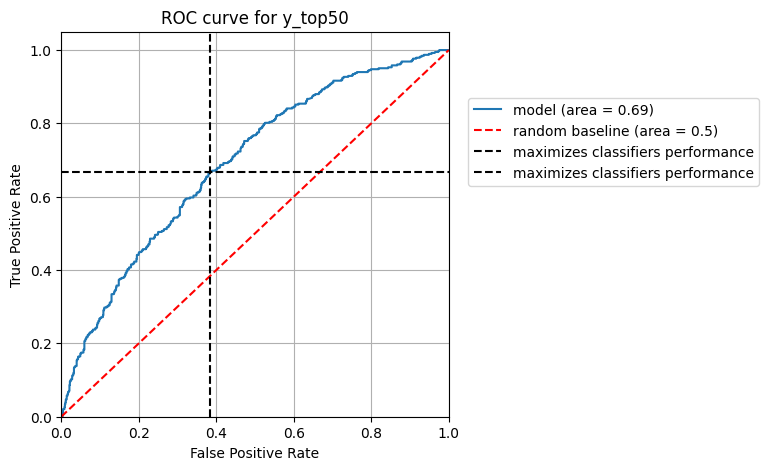

In [55]:
plot_roc_curve(y_true=df_copy['top10'], y_pred_prob=df_copy['top10_pred'])

In [56]:
fpr, tpr, thresholds = roc_curve(df_copy['top10'], df_copy['top10_pred'])
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

In [57]:
tn, fp, fn, tp = confusion_matrix(df_copy['top10'], (df_copy['top10_pred'] >= optimal_threshold).astype(int)).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(accuracy)

0.6319612590799032


In [58]:
recall = tp / (tp+fn)
print(recall)

0.6684073107049608


In [59]:
specificity = tn / (tn+fp)
print(specificity)

0.6156542056074766
